# TP de Synthèse : Intelligence Artificielle avec Python

L'objectif de ce TP est de faire une synthèse de toutes les notions que vous avez vu sur l'ensemble du cours IA & Python.

À partir d'un jeu de donnée imposé, vous allez devoir proposer une analyse détaillée, et produire des modèles prédictifs avec les meilleures performances possibles.

## À votre disposition :
- Un fichier `Hotel Reservations.csv` contenant les données à analyser, avec pour chaque donnée la valeur de la classe à prédire
- Un fichier `Donnees_Test.csv` de test, comprenant des données sans la valeur de la classe
- Ce notebook, contenant toutes vos instructions, ainsi qu'une description du _Dataset_

## Méthode de travail :
Ce travail peut-être effectué seul, ou en groupe de 2 personnes.

## Rendus attendus :
- Un notebook comprenant votre analyse détaillé du _Dataset_, et la construction de vos modèles prédictifs
- Un fichier CSV, avec sur chaque ligne votre prédiction de classe pour la ligne correspondante dans le fichier de test (`Donnees_Test.csv`).<br/>Ce fichier doit être nommé `NOM_Prénom.csv` ou `NOM1_NOM2.csv` (si binôme) ou `NOM_Prénom_vX.csv` (si plusieurs versions), et ne contient qu'une info par ligne et sans entête de colonne :<br/> uniquement les valeurs `Canceled` ou `Not_Canceled`.

## Évaluation :
- Lorsque tous les groupes auront rendu leur fichier csv, le formateur fera tourner un script, pour identifier le groupe ayant produit le modèle avec le meilleur résultat sur le jeu de test.
- Vous devrez fournir vos notebook à un autre groupe de la classe, et relire le notebook d'un autre groupe, pour lui faire un retour sur la qualité de l'analyse de ses données.

## Description des données

Les données à votre disposition décrivent les informations des clients de réservations de chambres d'hôtels.

L'objectif est de détermine, pour chaque client, s'il risque d'annuler sa réservation.

Vous avez à votre disposition les attributs suivants :

- `Booking_ID`: identifiant unique de chaque réservation
- `no_of_adults`: nombre d'adultes dans la réservation
- `no_of_children`: nombre d'enfants dans la réservation
- `no_of_weekend_nights`: nombre de nuits en weekend (samedi ou dimanche) incluses dans la réservation
- `no_of_week_nights`: nombre de nuits de semaine (lundi au vendredi) incluses dans la réservation
- `type_of_meal_plan`: choix de formule repas
- `required_car_parking_space` : indique une réservation de place de parking (0 : non, 1 : oui)
- `room_type_reserved`: type de chambre réservé
- `lead_time` : nombre de jours entre la date de réservation et la date d'arrivée
- `arrival_year` : année de la date d'arrivée
- `arrival_month`: mois de la date d'arrivée
- `arrival_date`: jour de la date d'arrivée
- `market_segment_type`: désignation du segment marketing
- `repeated_guest` : indique s'il s'agit d'un client fréquent (0 : non, 1 : oui)
- `no_of_previous_cancellations` : nombre d'annulation déjà faite par ce client sur d'autres réservations
- `no_of_previous_bookings_not_canceled`: nombre de réservations déjà faites sans annulations
- `avg_price_per_room`: prix moyen journalier de la réservation (en euros)
- `no_of_special_requests`: nombre total des requêtes spécifiques du client (étage, vue, ...)
- `booking_status` : indique si la réservation a été annulée ou non (=classe à prédire !)

## Les questions auxquelles vous devez répondre

Nous vous proposons ci-après une liste de questions à vous poser.
Il ne s'agit pas d'une obligation, ni d'une liste exhaustive, mais elles doivent vous permettre de vérifier un certains nombre de points de votre analyse.

_N.B. : N'oubliez pas de vous appuyer dès que possible sur des représentations graphiques parlantes, et sur des statistiques précises._

1. Combien d'attributs ? 19
1. Combien de données ? 29999
1. Combien de classes ?
1. Quelle répartition entre les classes ?
1. Valeurs manquantes ? non
1. Quelle répartition des valeurs sur chaque attribut ?
1. Quelle caractérisation de chaque attribut ?
1. Corrélation entre certains attributs ?
1. Nettoyage des données nécessaire ?
1. Transformation des données ?
1. Normalisation ?
1. Quelle(s) forme(s) d'apprentissage ?
1. Quels algorithmes privilégier ?
1. Quelles performances privilégier ?
1. Comment améliorer les performances initiales ?
1. Comment choisir les paramètres des algorithmes ?

## Considérations supplémentaires

Il vous est également demandé de réfléchir aux questions suivantes :
1. Quelle valeur ajoutée pourrait apporter vos analyses et votre algorithme aux hôtels ?
1. À quels aspects législatisf devriez-vous prendre garde ?
1. Votre algorithme pourrait-il être utilisé à mauvais escient ?

### Import des dépendances

In [10]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import  confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

### Import des donnéees

In [11]:
df = pd.read_csv("Hotel Reservations.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            29999 non-null  object 
 1   no_of_adults                          29999 non-null  int64  
 2   no_of_children                        29999 non-null  int64  
 3   no_of_weekend_nights                  29999 non-null  int64  
 4   no_of_week_nights                     29999 non-null  int64  
 5   type_of_meal_plan                     29999 non-null  object 
 6   required_car_parking_space            29999 non-null  int64  
 7   room_type_reserved                    29999 non-null  object 
 8   lead_time                             29999 non-null  int64  
 9   arrival_year                          29999 non-null  int64  
 10  arrival_month                         29999 non-null  int64  
 11  arrival_date   

### Analyse des données

In [12]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            29999 non-null  object 
 1   no_of_adults                          29999 non-null  int64  
 2   no_of_children                        29999 non-null  int64  
 3   no_of_weekend_nights                  29999 non-null  int64  
 4   no_of_week_nights                     29999 non-null  int64  
 5   type_of_meal_plan                     29999 non-null  object 
 6   required_car_parking_space            29999 non-null  int64  
 7   room_type_reserved                    29999 non-null  object 
 8   lead_time                             29999 non-null  int64  
 9   arrival_year                          29999 non-null  int64  
 10  arrival_month                         29999 non-null  int64  
 11  arrival_date   

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000
mean,1.845862,0.105037,0.806127,2.202140,0.031301,85.503217,2017.821894,7.428548,15.583819,0.025668,0.022701,0.155139,103.412309,0.620687
std,0.518453,0.403747,0.868561,1.402214,0.174133,86.072456,0.382608,3.064046,8.723316,0.158144,0.353166,1.771725,35.043692,0.787359
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.500000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,127.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,375.500000,5.000000


 -   Booking_ID                            Discrète Qualitative (Inutile)
 -   no_of_adults                          Discrète Quantitative
 -   no_of_children                        Discrète Quantitative
 -   no_of_weekend_nights                  Discrète Quantitative
 -   no_of_week_nights                     Discrète Quantitative
 -   type_of_meal_plan                     Discrète Qualitative (à Encoder)
 -   required_car_parking_space            Discrète Qualitative
 -   room_type_reserved                    Discrète Qualitative (à Encoder)
 -   lead_time                             Continue Quantitative
 -   arrival_year                          Discrète Quantitative
 -  arrival_month                          Discrète Quantitative
 -  arrival_date                           Discrète Quantitative
 -  market_segment_type                    Discrète Qualitative (à Encoder)
 -  repeated_guest                         Discrète Qualitative
 -  no_of_previous_cancellations           Discrète Quantitative
 -  no_of_previous_bookings_not_canceled   Discrète Quantitative
 -  avg_price_per_room                     Continue Quantitative
 -  no_of_special_requests                 Discrète Quantitative
 -  booking_status                         Discrète Qualitative

- Environ 30 % d'annulation

## Nettoyage des données

### Données temporelles en saison

In [13]:
def mois_to_saison(mois):
    if mois in [3, 4, 5]:
        return 'Printemps'
    elif mois in [6, 7, 8]:
        return 'Été'
    elif mois in [9, 10, 11]:
        return 'Automne'
    else:
        return 'Hiver'

df['season'] = df['arrival_month'].apply(mois_to_saison)
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,season
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,Automne
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,Automne
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,Hiver
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,Printemps
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,Printemps
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,INN29995,2,0,0,2,Meal Plan 1,0,Room_Type 1,322,2018,12,9,Offline,0,0,0,52.00,0,Not_Canceled,Hiver
29995,INN29996,2,0,0,3,Meal Plan 1,0,Room_Type 1,91,2018,5,11,Offline,0,0,0,75.00,0,Not_Canceled,Printemps
29996,INN29997,2,0,0,2,Meal Plan 1,0,Room_Type 1,24,2018,4,21,Online,0,0,0,117.00,0,Canceled,Printemps
29997,INN29998,1,0,0,2,Meal Plan 1,0,Room_Type 1,266,2018,12,2,Offline,0,0,0,75.00,0,Not_Canceled,Hiver


- Saison devient une donnée Discrète Qualitative

### Suppression des données inutiles

In [14]:
cols_to_delete = ['Booking_ID', 'arrival_date', 'arrival_month', 'arrival_year']
df.drop(cols_to_delete, axis=1, inplace=True)
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,season
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not_Canceled,Automne
1,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,Automne
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Canceled,Hiver
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Canceled,Printemps
4,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled,Printemps
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,2,0,0,2,Meal Plan 1,0,Room_Type 1,322,Offline,0,0,0,52.00,0,Not_Canceled,Hiver
29995,2,0,0,3,Meal Plan 1,0,Room_Type 1,91,Offline,0,0,0,75.00,0,Not_Canceled,Printemps
29996,2,0,0,2,Meal Plan 1,0,Room_Type 1,24,Online,0,0,0,117.00,0,Canceled,Printemps
29997,1,0,0,2,Meal Plan 1,0,Room_Type 1,266,Offline,0,0,0,75.00,0,Not_Canceled,Hiver


### Anomalies

In [15]:
quant_cols = df.select_dtypes(include=['int64', 'float64']).columns
X = df[quant_cols]

forest = IsolationForest(contamination=0.05)
forest.fit(X)

df['anomaly'] = forest.predict(X)

anomalies = df[df['anomaly'] == -1]

print(f"Nombre d’anomalies détectées : {len(anomalies)}")

Nombre d’anomalies détectées : 1500


### Suppression des anomalies

df = df[df['anomaly'] != 1]

## Exploration des données

### Proportion d'annulation

[Text(0.5, 1.0, "Proportions d'annulation")]

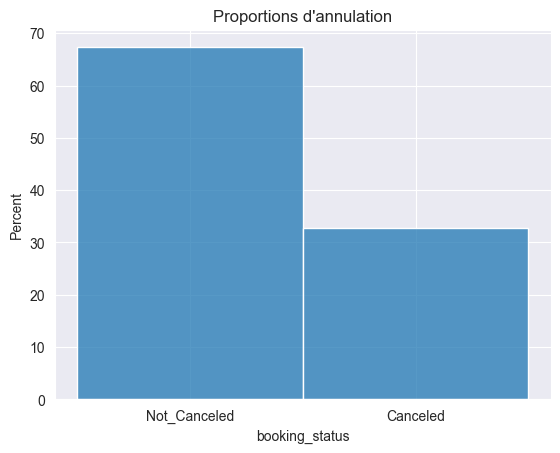

In [16]:
sns.histplot(data=df, x='booking_status', stat='percent').set(title="Proportions d'annulation")

### Corrélation

Text(0.5, 1.0, 'Matrice de corrélation des variables quantitatives')

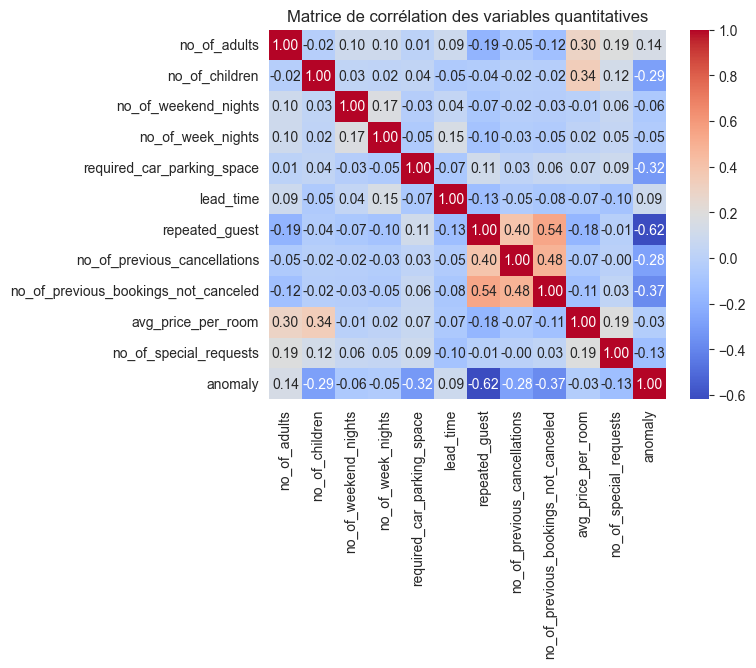

In [17]:
quant_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[quant_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation des variables quantitatives')

- Un client qui revient a moins de chance d'avoir annulé auparavant
- Un client qui a déjà annulé a plus de chance d'annuler à nouveau

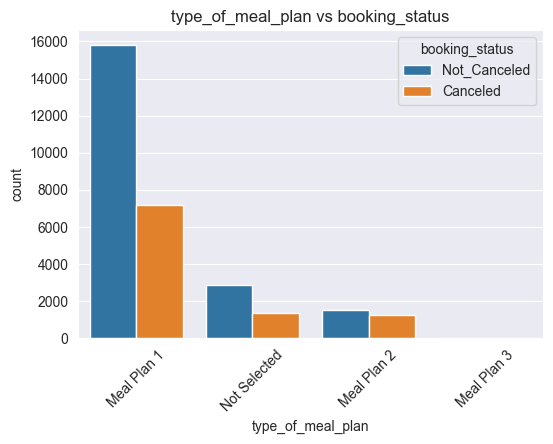

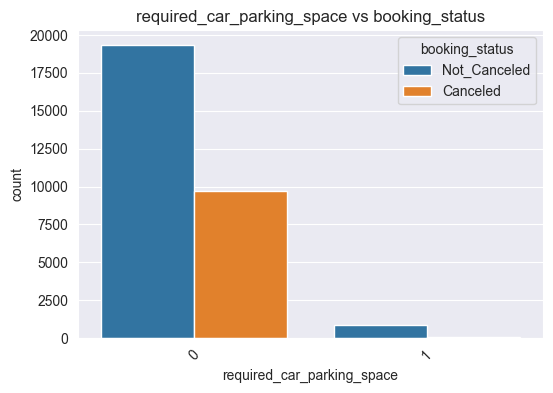

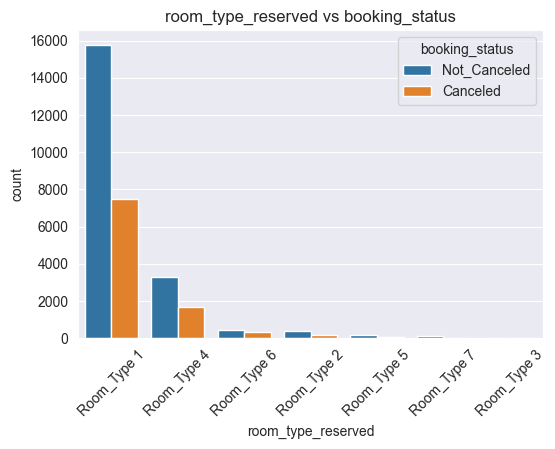

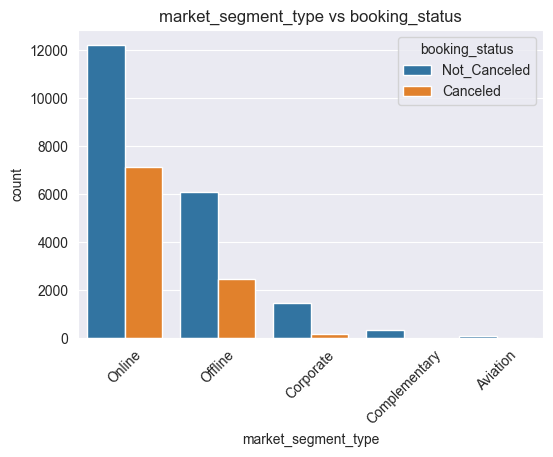

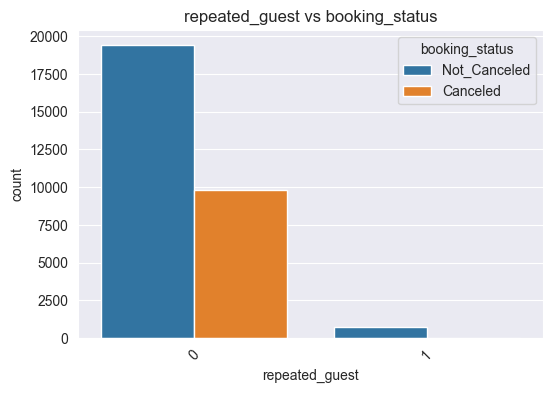

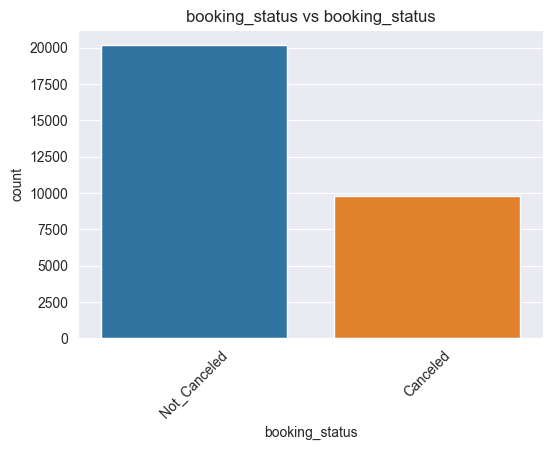

In [18]:
qual_cols = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
             'market_segment_type', 'repeated_guest', 'booking_status']
for col in qual_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='booking_status', order=df[col].value_counts().index)
    plt.title(f"{col} vs booking_status")
    plt.xticks(rotation=45)
    plt.show()

## Préparation des données

In [19]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
season                                  0
anomaly                                 0
dtype: int64

### Encoding & Normalisation

In [20]:
def encode_and_scale(df, cat_cols, quant_cols):
    df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

    scaler = StandardScaler()
    df_encoded[quant_cols] = scaler.fit_transform(df_encoded[quant_cols])

    return df_encoded

cat_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status', 'season']
quant_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
              'lead_time', 'no_of_previous_cancellations',
              'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

df = encode_and_scale(df, cat_cols, quant_cols)
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,...,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Not_Canceled,season_Hiver,season_Printemps,season_Été
0,0.297310,-0.260159,0.223216,-0.144160,0,1.609099,0,-0.064279,-0.087565,-1.096144,...,False,False,False,False,True,False,True,False,False,False
1,0.297310,-0.260159,1.374565,0.569009,0,-0.935312,0,-0.064279,-0.087565,0.093248,...,False,False,False,False,False,True,True,False,False,False
2,-1.631538,-0.260159,1.374565,-0.857330,0,-0.981785,0,-0.064279,-0.087565,-1.238826,...,False,False,False,False,False,True,False,True,False,False
3,0.297310,-0.260159,-0.928133,-0.144160,0,1.458061,0,-0.064279,-0.087565,-0.097375,...,False,False,False,False,False,True,False,False,True,False
4,0.297310,-0.260159,0.223216,-0.857330,0,-0.435724,0,-0.064279,-0.087565,-0.254324,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,0.297310,-0.260159,-0.928133,-0.144160,0,2.747693,0,-0.064279,-0.087565,-1.467116,...,False,False,False,False,True,False,True,True,False,False
29995,0.297310,-0.260159,-0.928133,0.569009,0,0.063863,0,-0.064279,-0.087565,-0.810782,...,False,False,False,False,True,False,True,False,True,False
29996,0.297310,-0.260159,-0.928133,-0.144160,0,-0.714564,0,-0.064279,-0.087565,0.387742,...,False,False,False,False,False,True,False,False,True,False
29997,-1.631538,-0.260159,-0.928133,-0.144160,0,2.097068,0,-0.064279,-0.087565,-0.810782,...,False,False,False,False,True,False,True,True,False,False


### Séparation du jeu de test

In [21]:
X = df.drop('booking_status_Not_Canceled', axis=1)
y = df['booking_status_Not_Canceled']
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=10)

## Modélisation

In [22]:
ITERATIONS = 2
pscore = lambda lib, score, detail='': print(F"{lib}{('',f" ({detail})")[len(str(detail))>0]} : {100*score:.2f}%")

max_values = [
        {'metric': 'accuracy',  'value': 0, 'algo': '', 'params': ''},
        {'metric': 'precision', 'value': 0, 'algo': '', 'params': ''},
        {'metric': 'recall', 'value': 0, 'algo': '', 'params': ''}
]

def max_value(metric, value, algo, params = ''):
    for item in max_values:
        if item['metric'] == metric:
            if value > item['value']:
                item['value'] = value
                item['algo'] = algo
                item['params'] = params
            break


In [22]:

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'class_weight': [None, 'balanced']
}

rf = RandomForestClassifier(random_state=42)

accuracy_scores = GridSearchCV(rf, param_grid, cv=ITERATIONS, scoring='accuracy')
accuracy_scores.fit(X, y)
max_value('accuracy', accuracy_scores.best_score_, 'Random Forest', accuracy_scores.best_params_)

KeyboardInterrupt: 

KeyboardInterrupt: 

### Gaussian

In [14]:
# param_grid = {
#     'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
# }
#
# gnb = GaussianNB()
#
# accuracy_scores = GridSearchCV(gnb, param_grid, cv=ITERATIONS, scoring='accuracy')
# accuracy_scores.fit(X, y)
# max_value('accuracy', accuracy_scores.best_score_, 'Gaussian', accuracy_scores.best_params_)

# accuracy_scores = cross_val_score(gnb, X, y, cv=ITERATIONS, scoring='accuracy')
# precision_scores = cross_val_score(gnb, X, y, cv=ITERATIONS, scoring='precision')
# recall_scores = cross_val_score(gnb, X, y, cv=ITERATIONS, scoring='recall')
#
# accuracy_avg = accuracy_scores.mean()
# precision_avg = precision_scores.mean()
# recall_avg = recall_scores.mean()
#
# pscore('Gaussian', accuracy_avg, 'Accuracy')
# pscore('Gaussian', precision_avg, 'Precision')
# pscore('Gaussian', recall_avg, 'Recall')
#
# max_value('accuracy', accuracy_avg, 'Gaussian')
# max_value('precision', precision_avg, 'Gaussian')
# max_value('recall', recall_avg, 'Gaussian')

### K Nearest Neighbors

In [15]:
# param_grid = {
#     'n_neighbors': [3, 5, 7, 9],
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan']
# }
#
# knn = KNeighborsClassifier()
#
# accuracy_scores = GridSearchCV(knn, param_grid, cv=ITERATIONS, scoring='accuracy')
# accuracy_scores.fit(X, y)
# max_value('accuracy', accuracy_scores.best_score_, 'K Nearest Neighbors', accuracy_scores.best_params_)
#
# accuracy_scores = cross_val_score(knn, X, y, cv=ITERATIONS, scoring='accuracy')
# precision_scores = cross_val_score(knn, X, y, cv=ITERATIONS, scoring='precision')
# recall_scores = cross_val_score(knn, X, y, cv=ITERATIONS, scoring='recall')
#
# accuracy_avg = accuracy_scores.mean()
# precision_avg = precision_scores.mean()
# recall_avg = recall_scores.mean()
#
#
# pscore('K Nearest Neighbors', accuracy_avg, 'Accuracy')
# pscore('K Nearest Neighbors', precision_avg, 'Precision')
# pscore('K Nearest Neighbors', recall_avg, 'Recall')
#
# max_value('accuracy', accuracy_avg, 'K Nearest Neighbors')
# max_value('precision', precision_avg, 'K Nearest Neighbors')
# max_value('recall', recall_avg, 'K Nearest Neighbors')


### Support Vector Machine

In [16]:
# param_grid = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf'],
#     'gamma': ['scale', 'auto']
# }
#
# svm = SVC(kernel='rbf')
#
# accuracy_scores = GridSearchCV(svm, param_grid, cv=ITERATIONS, scoring='accuracy')
# accuracy_scores.fit(X, y)
# max_value('accuracy', accuracy_scores.best_score_, 'Support Vector Machine', accuracy_scores.best_params_)

#
# accuracy_scores = cross_val_score(svm, X, y, cv=ITERATIONS, scoring='accuracy')
# precision_scores = cross_val_score(svm, X, y, cv=ITERATIONS, scoring='precision')
# recall_scores = cross_val_score(svm, X, y, cv=ITERATIONS, scoring='recall')
#
# accuracy_avg = accuracy_scores.mean()
# precision_avg = precision_scores.mean()
# recall_avg = recall_scores.mean()
#
# pscore('Support Vector Machine', accuracy_avg, 'Accuracy')
# pscore('Support Vector Machine', precision_avg, 'Precision')
# pscore('Support Vector Machine', recall_avg, 'Recall')
#
# max_value('accuracy', accuracy_avg, 'Support Vector Machine')
# max_value('precision', precision_avg, 'Support Vector Machine')
# max_value('recall', recall_avg, 'Support Vector Machine')


### Artificial Neural Network

In [17]:
# param_grid = {
#     'hidden_layer_sizes': [(50,), (100,), (100, 50)],
#     'activation': ['relu', 'tanh'],
#     'alpha': [0.0001, 0.001],
#     'max_iter': [1000]
# }
#
# ann = MLPClassifier(random_state=42)
#
# accuracy_scores = GridSearchCV(ann, param_grid, cv=ITERATIONS, scoring='accuracy')
# accuracy_scores.fit(X, y)
# max_value('accuracy', accuracy_scores.best_score_, 'Artificial Neural Network', accuracy_scores.best_params_)


# accuracy_scores = cross_val_score(ann, X, y, cv=ITERATIONS, scoring='accuracy')
# precision_scores = cross_val_score(ann, X, y, cv=ITERATIONS, scoring='precision')
# recall_scores = cross_val_score(ann, X, y, cv=ITERATIONS, scoring='recall')

# accuracy_avg = accuracy_scores.mean()
# precision_avg = precision_scores.mean()
# recall_avg = recall_scores.mean()
#
# pscore('Artificial Neural Network', accuracy_avg, 'Accuracy')
# pscore('Artificial Neural Network', precision_avg, 'Precision')
# pscore('Artificial Neural Network', recall_avg, 'Recall')
#
# max_value('accuracy', accuracy_avg, 'Artificial Neural Network')
# max_value('precision', precision_avg, 'Artificial Neural Network')
# max_value('recall', recall_avg, 'Artificial Neural Network')


### Résultat des tests

In [18]:
max_accuracy = next(x for x in max_values if x['metric'] == 'accuracy')
# max_precision = next(x for x in max_values if x['metric'] == 'precision')
# max_recall = next(x for x in max_values if x['metric'] == 'recall')

pscore('Max Accuracy', max_accuracy['value'], f"Algo : {max_accuracy['algo']}  Params :  {max_accuracy['params']}")
# pscore('Max Precision', max_precision['value'], max_precision['algo'])
# pscore('Max Recall', max_recall['value'], max_recall['algo'])



Max Accuracy (Algo : K Nearest Neighbors  Params :  {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}) : 85.72%


### Test en condition réels

In [55]:
model = KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance').fit(X, y)
result = pd.read_csv('Donnees_test.csv')

def prepare_for_prediction(df, ref_cols):
    for col in ref_cols:
        if col not in df.columns:
            df[col] = 0
    df = df[ref_cols]
    return df

X_cols = X.columns

cols_to_delete = ['Booking_ID', 'arrival_date', 'arrival_month', 'arrival_year', 'booking_status']
cat_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'season']
quant_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
              'lead_time', 'no_of_previous_cancellations',
              'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

result['season'] = result['arrival_month'].apply(mois_to_saison)

result.drop(columns=cols_to_delete, errors='ignore', inplace=True)


result_encoded = encode_and_scale(result, cat_cols, quant_cols)

result_ready = prepare_for_prediction(result_encoded, X_cols)

predictions = model.predict(result_ready)

prediction_labels = ['Not_Canceled' if x else 'Canceled' for x in predictions]

with open('ROVERE_Alex.csv', mode='w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    for item in prediction_labels:
        writer.writerow([item])

pd.read_csv('ROVERE_Alex.csv')

,Not_Canceled
0,Canceled
1,Not_Canceled
2,Not_Canceled
3,Not_Canceled
4,Not_Canceled
...,...
6270,Not_Canceled
6271,Not_Canceled
6272,Not_Canceled
6273,Canceled
